# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Sonali
[nltk_data]     Goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
!pip install newsapi-python

In [4]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_articles = newsapi.get_everything(
    q = " Bitcoin",
    language = "en",
    page_size=50,
    sort_by = "relevancy",
    from_param='2020-12-29',
    to='2021-01-27', )


In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_articles = newsapi.get_everything(
    q = "Ethereum",
    language = "en",
    page_size=50,
    sort_by = "relevancy",
    from_param='2020-12-29',
    to='2021-01-27', )

   

In [8]:
Bitcoin_articles["articles"][0]


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Matt Novak',
 'title': 'India Weighs 18% Tax on Bitcoin After Legalization of Cryptocurrencies',
 'description': 'The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. It’s not clear whether the proposed goods and services tax (GST) would apply to other cryptocurrencies like ether, the second lar…',
 'url': 'https://gizmodo.com/india-weighs-18-tax-on-bitcoin-after-legalization-of-c-1845960924',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/te9tpxwlizd7fmtf5ra2.jpg',
 'publishedAt': '2020-12-29T11:50:00Z',
 'content': 'The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars]'}

In [9]:
len(Bitcoin_articles)

3

In [10]:
Bitcoin_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
Bitcoin_sentiments = []
for item in Bitcoin_articles["articles"]:
    try:
        text = item["content"]
        date = item["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2020-12-29,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941
1,2021-01-03,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749
2,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904
3,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689
4,2021-01-02,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868


In [12]:
Ethereum_sentiments = []
for item in Ethereum_articles["articles"]:
    try:
        text = item["content"]
        date = item["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-05,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.00,0.926
1,2021-01-04,Ethereum creator Vitalik Buterin.\r\n14 with 1...,0.5256,0.099,0.00,0.901
2,2021-01-04,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.06,0.940
3,2021-01-08,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000
4,2021-01-08,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,48.000000,48.000000,48.000000,48.000000
mean,0.115265,0.057208,0.023417,0.919417
std,0.364872,0.083869,0.043335,0.097087
min,-0.599400,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.873250
50%,0.000000,0.000000,0.000000,0.940000
75%,0.376275,0.126750,0.044250,1.000000
max,0.921700,0.353000,0.176000,1.000000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,44.000000,44.000000,44.000000,44.000000
mean,0.157850,0.056795,0.017295,0.925909
std,0.351427,0.074718,0.036117,0.083178
min,-0.654900,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.875000
50%,0.000000,0.000000,0.000000,0.942000
75%,0.467575,0.108750,0.000000,1.000000
max,0.839900,0.263000,0.156000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etheruem has a higher mean positive score.

Q: Which coin had the highest compound score?

A: Etheruem has a higher compound score.

Q. Which coin had the highest positive score?

A: Etheruem has a higher positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words.extend(['from', 'subject', 're', 'edu', 'use','said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'])
print(len(stop_words))

lemmatizer = WordNetLemmatizer()

179
193


In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
    # Create a list of the words
    words = word_tokenize(re_clean)

    # Convert the words to lowercase
    lowerwords = [word.lower() for word in words]

    
    # Remove the punctuation
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

    
    
    # Remove the stop words
    nostop = [word for word in nopunctuation if word not in stop_words]

    
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in lowerwords]
    
    return tokens

In [18]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-29,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941,"[government, india, considering, tax, bitcoin,..."
1,2021-01-03,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749,"[week, shattered, yearslong, aspiration, reach..."
2,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904,"[mt, gox, went, bankrupt, wa, world, largest, ..."
3,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689,"[ban, reflects, twitters, failure, promote, he..."
4,2021-01-02,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868,"[new, york, cnn, businessbitcoin, ha, flirting..."


In [19]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-01-05,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.00,0.926,"[cryptocurrencies, stole, headline, first, sto..."
1,2021-01-04,Ethereum creator Vitalik Buterin.\r\n14 with 1...,0.5256,0.099,0.00,0.901,"[ethereum, creator, vitalik, buterin, poster, ..."
2,2021-01-04,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.06,0.940,"[bitcoin, fizzled, monday, trading, famously, ..."
3,2021-01-08,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000,"[reuters, stafffile, photo, representation, vi..."
4,2021-01-08,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000,"[reuters, stafffile, photo, representation, vi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btcwords=[]
i=0
while i < len(bitcoin_df):
    btcwords = btcwords + bitcoin_df["tokens"][i]
    i+=1

#btcwordcounts = Counter(btcwords)
btcgramcounts = Counter(ngrams(btcwords, n=2))
print(dict(btcgramcounts.most_common(10)))

{('currency', 'bitcoin'): 18, ('virtual', 'currency'): 17, ('bitcoin', 'seen'): 15, ('illustration', 'taken'): 15, ('char', 'reuters'): 13, ('reuters', 'bitcoin'): 13, ('photo', 'representation'): 13, ('representation', 'virtual'): 13, ('taken', 'november'): 13, ('november', 'reutersdado'): 13}


In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethwords=[]
i=0
while i < len(ethereum_df):
    ethwords = ethwords + ethereum_df["tokens"][i]
    i+=1

#btcwordcounts = Counter(btcwords)
ethgramcounts = Counter(ngrams(ethwords, n=2))
print(dict(ethgramcounts.most_common(10)))

{('virtual', 'currency'): 14, ('currency', 'bitcoin'): 13, ('illustration', 'taken'): 13, ('char', 'reuters'): 12, ('reuters', 'stafffile'): 12, ('stafffile', 'photo'): 12, ('bitcoin', 'seen'): 10, ('photo', 'representation'): 7, ('representation', 'virtual'): 7, ('photo', 'representations'): 6}


In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)
token_count(btcwords,10)

[('char', 47),
 ('bitcoin', 46),
 ('reuters', 37),
 ('currency', 25),
 ('photo', 18),
 ('virtual', 17),
 ('taken', 17),
 ('seen', 15),
 ('illustration', 15),
 ('reutersdado', 15)]

In [25]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethwords,10)

[('char', 44),
 ('bitcoin', 29),
 ('currency', 21),
 ('reuters', 21),
 ('taken', 18),
 ('photo', 16),
 ('virtual', 14),
 ('illustration', 14),
 ('reutersdado', 13),
 ('stafffile', 12)]

In [26]:
!pip install wordcloud

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [28]:
bitcoin_df["tokens"][0]

['government',
 'india',
 'considering',
 'tax',
 'bitcoin',
 'transaction',
 'according',
 'new',
 'report',
 'times',
 'india',
 'clear',
 'whether',
 'proposed',
 'good',
 'service',
 'tax',
 'gst',
 'would',
 'char']

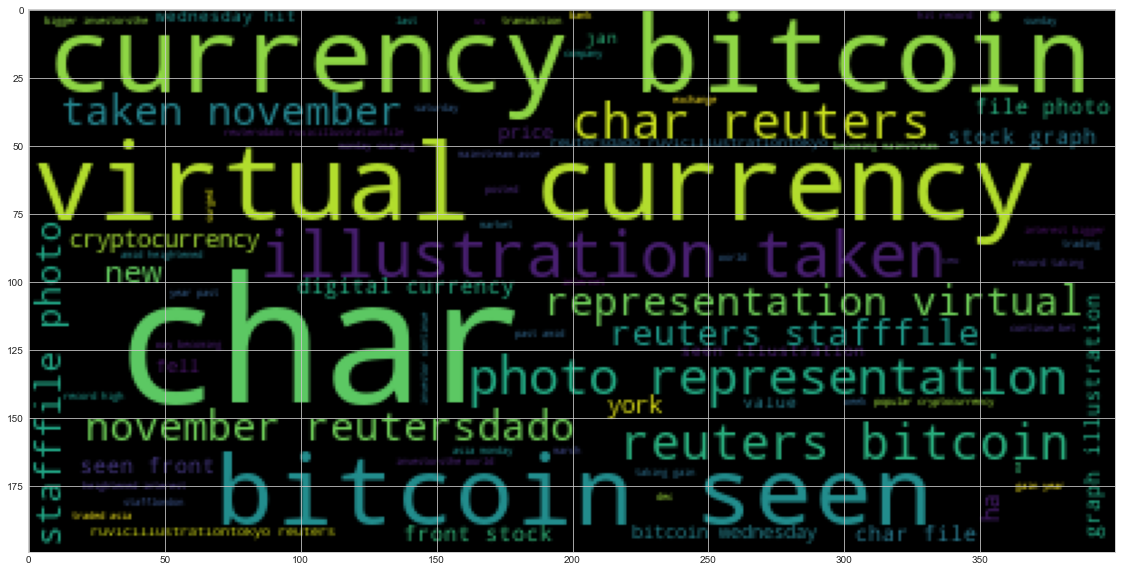

In [29]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btcwcwords=[]
i=0
while i < len(bitcoin_df):
    btcwcwords = btcwcwords + bitcoin_df["tokens"][i]
    i+=1

btcwcwords = " ".join(btcwcwords)
btcwc = WordCloud().generate(btcwcwords)
plt.imshow(btcwc)

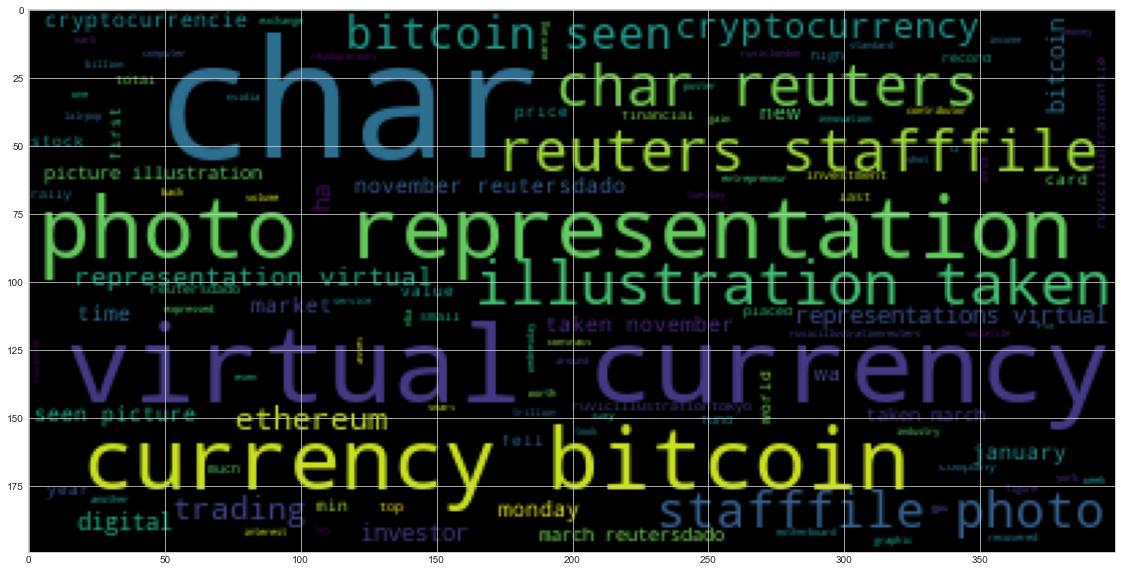

In [30]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethwcwords=[]
i=0
while i < len(ethereum_df):
    ethwcwords = ethwcwords + ethereum_df["tokens"][i]
    i+=1

ethwcwords = " ".join(ethwcwords)
ethwc = WordCloud().generate(ethwcwords)
plt.imshow(ethwc)

In [31]:
!pip install spacy

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
allbtctext=[]
i=0
while i < len(bitcoin_df):
    allbtctext = allbtctext + bitcoin_df["text"][i].split()
    i+=1

allbtctext = " ".join(allbtctext)

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btcdoc = nlp(allbtctext)

# Add a title to the document
# YOUR CODE HERE!
btcdoc.user_data["title"] = "BTC Named Entity Recognition"

In [37]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btcdoc, style="ent")

In [38]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in btcdoc.ents])

['India', '18%', 'bitcoin', 'the Times of India', 'Just weeks', '20,000', 'Bitcoin', 'Saturday', '33,000', 'CoinDesk', 'Mt. Gox', '2014', 'Bitcoin', '850,000', 'Bitcoins', 'thousands', 'Twitters', 'Hannah McKay-Pool/Getty Images Twitter', 'Jack Dorsey', 'Tweets', 'US', 'Don', 'New York', 'CNN', '$30,000 mark', 'weeks', 'Saturday', 'above $33,000', 'Gemini', 'Blockrize', 'today', 'Blockrizes', 'Later this year', 'Joe Bidens', 'the U.S. Treasury Department', 'Michael S. Barr', 'bitcoin', 'the popular cryptocurrency exchange', 'digital', 'over millions', 'Last Sunday', 'Bitcoin', '50%', 'the previous month', 'the week', '24.8%', 'Bitcoin', '12th', 'Forbes', 'Square', 'Alex Castro', 'Jack Dorsey', 'Twitter', 'Reuters Staff LONDON', 'Dec 30', 'Reuters', 'Bitcoin', 'Wednesday', 'a record $28,599.99', 'this year', '295%', '3.5%', '28,349', 'Reuters', 'LONDON', 'Jan 4', 'Reuters', 'Bitcoin', '14%', '27,805', 'Monday', 'the new year', '33,365', 'Asia', 'Monday', '34,800', 'Sunday', 'Posted Bitc

---

### Ethereum NER

In [39]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
allethtext=[]
i=0
while i < len(ethereum_df):
    allethtext = allethtext + ethereum_df["text"][i].split()
    i+=1

allethtext = " ".join(allethtext)

In [40]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethdoc = nlp(allethtext)

# Add a title to the document
# YOUR CODE HERE!
ethdoc.user_data["title"] = "ETH Named Entity Recognition"

In [42]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethdoc, style="ent")

In [43]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in ethdoc.ents])

['first', 'day of 2021', 'bitcoin', 'the weekend', 'Vitalik Buterin', '14', '11', 'Ether', 'second', 'above $1,000', 'Bitcoin', 'Monday', 'new-year', 'as much as 17', 'March', 'Reuters', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'Reuters', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'January 7, 2021', 'REUTERS', 'Dado Ruvic', 'Reuters', 'Bitcoin', 'January 7, 2021', 'REUTERS', 'Dado Ruvic', '2020', 'Las Vegas', 'dozens', '3080', 'Reuters', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'January 9, 2021 7', '2020', 'the year', 'LONDON', 'Reuters', 'Bitcoin', 'Wednesday', 'a record $28,599.99', 'digital', 'this year', '+1092', '1', '1', 'more than $1 trillion', 'bitcoin', 'Reuters', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Dado Ruvic LONDON', 'Reuters', 'Reuters', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'May 26, 2020', 'REUTERS/', 'Reu', 'Reuters', 'November 19, 2020', 'REUTERS/Dado Ruvic/Illust

---